In [30]:
from tqdm import tqdm
tqdm.pandas()

In [31]:
%matplotlib inline

from wordcloud import WordCloud # 워드클라우드 제작 라이브러리
import pandas as pd # 데이터 프레임 라이브러리
import numpy as np # 행렬 라이브러리
import matplotlib.pyplot as plt # 워드클라우드 시각화 라이브러리
import seaborn as sns

#warning 메시지 표시 안함
import warnings
warnings.filterwarnings(action = 'ignore')
from konlpy.tag import Okt 
okt = Okt()

In [32]:
data = pd.read_excel('더파이널스리뷰_빅헤드.xlsx')
#필요없는 컬럼 삭제
del data['Unnamed: 0']
data.head()

,id,comment
0,빅헤드,어제 베타가 열려서 플레이해보고 느낀 '개인적인' 문제점1.최적화가 갑자기 뒤졌습니...
1,Mun Yumin,이거 트레일러에 한국중계진 목소리 나레이션으로 계속 나오던데 OST가 중간에 계속나...
2,Ged Wed,이게 아직 다 완성이 안돼서 그렇지 모션이랑 이펙트 좀 개선해서 출시되면 진짜 개꿀...
3,Hyun-joong Kim,와..진짜 게임이해도랑 센스는...진짜 너무 부럽고 쩐다...부디 fps암흑기에 부...
4,1S1K,"진짜 경기하는듯한 확성기 나레이션과, 대회같은 배경음악과 사운드, 다양한 가젯선택으..."


In [33]:
len(data)

463

In [34]:
#결측치확인
print(data.isnull().sum())

id         1
comment    0
dtype: int64


In [35]:
#결측치 제거
data.dropna(inplace=True)

In [36]:
#결측치확인
print(data.isnull().sum())

id         0
comment    0
dtype: int64


In [37]:
# 유니크한 샘플의 수 또는 중복을 제거한 샘플의 수
print(data['comment'].nunique())

461


In [38]:
data.drop_duplicates(subset=['comment'], inplace=True)
len(data)

461

In [39]:
data['comment'].value_counts()

어제 베타가 열려서 플레이해보고 느낀 '개인적인' 문제점1.최적화가 갑자기 뒤졌습니다. 분명 프리뷰 때는 144가 방어가 됐는데 갑자기 60도 방어가 안되는 중 2.솔큐돌려보니까 리스폰 +전멸리스크 너무 큼... 3인큐 할때처럼 삥뽕해서 살리는 것도 안되는데 팀원들 주르륵 죽으면 최대 60초정도 손가락 빨아야함 겜이 대충 5분인데 3.짚라인이나 점프패드 탈 때 조작감이 역시 큰 단점    1
진짜 재밌다니까?                                                                                                                                                                                                                  1
유저들 개돼지 취급하면서 쓸어 모았던 돈들 이제야 좀 제대로 쓰고 있네                                                                                                                                                                                    1
배그 오버워치 서든 합치면서 맵만 꾸민느낌인대                                                                                                                                                                                                  1
참고로 이겜 베브개발진들이 들어간걸로 알아요ㅋㅋ                                                                                          

In [40]:
data['comment'] = data['comment'].str.replace('[^가-힣]', ' ', regex = True)
data['comment']

0      어제 베타가 열려서 플레이해보고 느낀  개인적인  문제점  최적화가 갑자기 뒤졌습니...
1      이거 트레일러에 한국중계진 목소리 나레이션으로 계속 나오던데    가 중간에 계속나...
2      이게 아직 다 완성이 안돼서 그렇지 모션이랑 이펙트 좀 개선해서 출시되면 진짜 개꿀...
3      와  진짜 게임이해도랑 센스는   진짜 너무 부럽고 쩐다   부디    암흑기에 부...
4      진짜 경기하는듯한 확성기 나레이션과  대회같은 배경음악과 사운드  다양한 가젯선택으...
                             ...                        
458                                                   오올
459                              너무 시끄럽워  게임이  실감이 전혀 없어
460                                            음    모르겠다
461                                              재미없어보이누
462                                          네 재미 없어보이네요
Name: comment, Length: 461, dtype: object

In [41]:
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from nltk import word_tokenize

In [42]:
from konlpy.tag import Okt

In [43]:
#원하는 태그 추출&불용어 제거
okt = Okt()

#불용어
#한국어불용어사전 불러오기
stopwords = pd.read_csv('ko-stopwords.csv')

stopwords=list(stopwords['stopwords'])
stopwords.extend(['빅헤드', '요즘', '되다', '하다', '보이다', '이다', '돼다', '해주다', '진짜', '만들다', '더', '파이널스'
                  '싶다', '듯', '캐릭터'
                 ]) #불용어 추가
stopwords=set(stopwords)

#형태소 분석 함수 만들기
def okt_pos_tagging(string):
    pos_words = okt.pos(string, stem=True, norm=True)#형태소 분석, 단어는 사전형으로 바꿔주기
    words = [word for word, tag in pos_words if tag in ['Noun', 'Adjective', 'Verb', 'Adverb'] if word not in stopwords]
    return words

In [44]:
#형태소 분석 적용
tokenizing_doc=[]
for i in tqdm(data['comment']):
    tokenizing_doc.append(okt_pos_tagging(i))
data['token']=tokenizing_doc#새로운 tokenizing이라는 컬럼에 키워드 형태로 만든 원

100%|██████████| 461/461 [00:00<00:00, 539.71it/s]


In [45]:
data

,id,comment,token
0,빅헤드,어제 베타가 열려서 플레이해보고 느낀 개인적인 문제점 최적화가 갑자기 뒤졌습니...,"[어제, 베타, 열리다, 플레이, 해보다, 느끼다, 개인, 문제점, 최적화, 갑자기..."
1,Mun Yumin,이거 트레일러에 한국중계진 목소리 나레이션으로 계속 나오던데 가 중간에 계속나...,"[거, 트레일러, 한국, 중계, 진, 목소리, 나레이션, 계속, 나오다, 가다, 중..."
2,Ged Wed,이게 아직 다 완성이 안돼서 그렇지 모션이랑 이펙트 좀 개선해서 출시되면 진짜 개꿀...,"[아직, 다, 완성, 그렇다, 모션, 이펙트, 개선, 출시, 개꿀잼, 특히, 대회,..."
3,Hyun-joong Kim,와 진짜 게임이해도랑 센스는 진짜 너무 부럽고 쩐다 부디 암흑기에 부...,"[오다, 게임, 이해도, 센스, 너무, 부럽다, 쩐다, 부디, 암흑, 기, 부흥, ..."
4,1S1K,진짜 경기하는듯한 확성기 나레이션과 대회같은 배경음악과 사운드 다양한 가젯선택으...,"[경기, 확성기, 나레이션, 대회, 배경음악, 사운드, 다양하다, 가젯, 선택, 나..."
...,...,...,...
458,썰매타는 니코세이,오올,[]
459,레이,너무 시끄럽워 게임이 실감이 전혀 없어,"[너무, 시끄럽다, 게임, 실감, 전혀, 없다]"
460,뚱뚱,음 모르겠다,"[음, 모르다]"
461,J C,재미없어보이누,"[재미없다, 보이, 누]"


In [46]:
#명사 추출 
text_noun=[okt.nouns(doc) for doc in data.comment]
data['text_noun'] = text_noun
data['text_noun'] = data.text_noun.apply(lambda x: [a for a in x if a not in stopwords])

In [47]:
data.head()

,id,comment,token,text_noun
0,빅헤드,어제 베타가 열려서 플레이해보고 느낀 개인적인 문제점 최적화가 갑자기 뒤졌습니...,"[어제, 베타, 열리다, 플레이, 해보다, 느끼다, 개인, 문제점, 최적화, 갑자기...","[어제, 베타, 플레이, 개인, 문제점, 최적화, 갑자기, 분명, 프리뷰, 방어, ..."
1,Mun Yumin,이거 트레일러에 한국중계진 목소리 나레이션으로 계속 나오던데 가 중간에 계속나...,"[거, 트레일러, 한국, 중계, 진, 목소리, 나레이션, 계속, 나오다, 가다, 중...","[거, 트레일러, 한국, 중계, 진, 목소리, 나레이션, 계속, 중간, 계속, 게임..."
2,Ged Wed,이게 아직 다 완성이 안돼서 그렇지 모션이랑 이펙트 좀 개선해서 출시되면 진짜 개꿀...,"[아직, 다, 완성, 그렇다, 모션, 이펙트, 개선, 출시, 개꿀잼, 특히, 대회,...","[완성, 모션, 이펙트, 개선, 출시, 개꿀잼, 대회, 맛]"
3,Hyun-joong Kim,와 진짜 게임이해도랑 센스는 진짜 너무 부럽고 쩐다 부디 암흑기에 부...,"[오다, 게임, 이해도, 센스, 너무, 부럽다, 쩐다, 부디, 암흑, 기, 부흥, ...","[게임, 이해도, 센스, 쩐다, 부디, 암흑, 기, 부흥, 길]"
4,1S1K,진짜 경기하는듯한 확성기 나레이션과 대회같은 배경음악과 사운드 다양한 가젯선택으...,"[경기, 확성기, 나레이션, 대회, 배경음악, 사운드, 다양하다, 가젯, 선택, 나...","[경기, 확성기, 나레이션, 대회, 배경음악, 사운드, 가젯, 선택, 탄창, 디테,..."


In [48]:
#리스트 차원 낮춰주는 함수 생성
def flatten(l):
    flatlist = []
    for elem in l:
        if type(elem) == list:
            for e in elem:
                flatlist.append(e)
        else:
            flatlist.append(elem)
    return flatlist

In [49]:
data1 = data.token.tolist() #series -> list
data2  = flatten(data1)
data2[:20]

['어제',
 '베타',
 '열리다',
 '플레이',
 '해보다',
 '느끼다',
 '개인',
 '문제점',
 '최적화',
 '갑자기',
 '뒤지다',
 '분명',
 '프리뷰',
 '가다',
 '방어',
 '갑자기',
 '도',
 '방어',
 '안되다',
 '중']

In [50]:
text = nltk.Text(data2)
text

<Text: 어제 베타 열리다 플레이 해보다 느끼다 개인 문제점...>

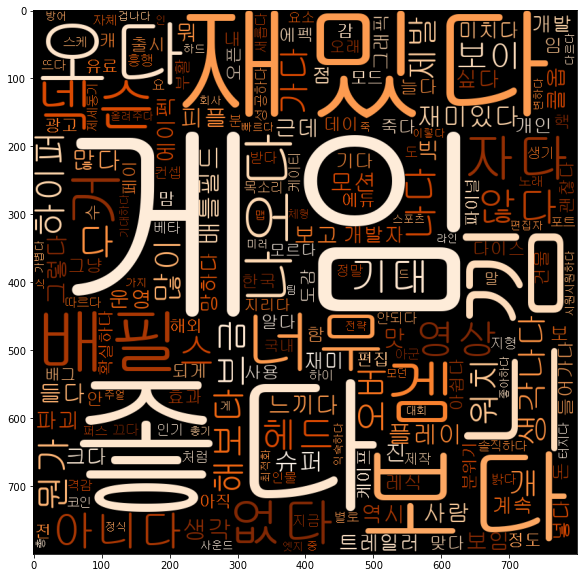

In [51]:
import matplotlib.pyplot as plt
#명사, 동사, 형용사, 부사로 워드클라우드
font_path = '본인 컴퓨터의 폰트 경로'
wordclouds = WordCloud(width=800, height=800, background_color='Black', colormap='Oranges', font_path = 'C:\Windows\Fonts\gulim.ttc')

from collections import Counter
count = Counter(text)
wordclouds = wordclouds.generate_from_frequencies(count)

fig = plt.figure(figsize = (10, 10))
plt.imshow(wordclouds.to_array())
plt.savefig('워드클라우드_다.png', bbox_inches='tight')
plt.show()

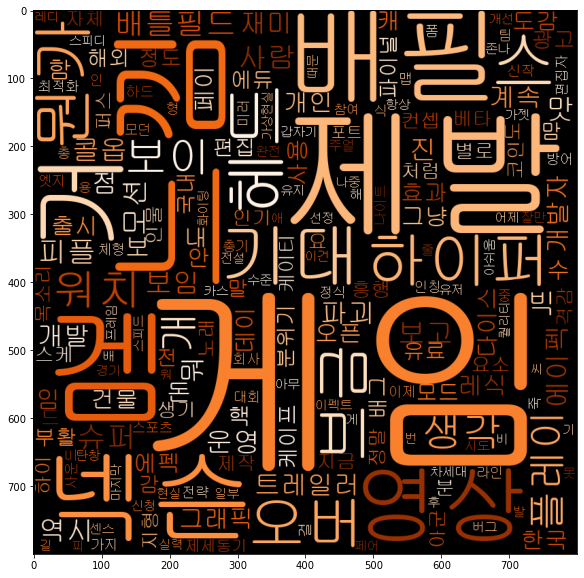

In [52]:
#명사로만 워드클라우드
df_noun = data.text_noun.tolist()
df_noun2 = flatten(df_noun)
text2 = nltk.Text(df_noun2)

wordclouds = WordCloud(width=800, height=800, background_color='Black', colormap='Oranges', font_path = 'C:\Windows\Fonts\gulim.ttc')

from collections import Counter
count = Counter(text2)
wordclouds = wordclouds.generate_from_frequencies(count)

fig = plt.figure(figsize = (10, 10))
plt.imshow(wordclouds.to_array())
plt.savefig('워드클라우드_명사.png', bbox_inches='tight')
plt.show()